In [1]:
import torch
import matplotlib.pyplot as plt

In [3]:
# Genrate data
torch.manual_seed(42)
N = 600
X = torch.randn(N, 2)
true_w = torch.tensor([[2.0], [-3.0]])
true_b = torch.tensor([0.5])

logits = X @ true_w + true_b
probs = torch.sigmoid(logits)
y = (probs > 0.5).float().view(-1, 1) # shape (N,1)

In [4]:
# Parameters
w = torch.randn(2, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

In [16]:
def train_logistic_regression(X, y, w, b, lambda_=None, lr=0.01, epochs=300):
    loss_fn = torch.nn.BCEWithLogitsLoss()
    losses = []
    for epoch in range(epochs):
        logits_pred = X @ w + b
        if lambda_ is None:
            loss = loss_fn(logits_pred, y)
        else:
            loss = loss_fn(logits_pred, y) + lambda_ * (w**2).sum()
        loss.backward()
        with torch.no_grad():
            w -= lr * w.grad
            b -= lr * b.grad
            w.grad.zero_()
            b.grad.zero_()

        losses.append(loss.item())
        if epoch % 20 == 0:
            print(f"epoch: {epoch}, loss: {loss.item():.4f}")
    return w, b, losses

w, b, losses = train_logistic_regression(X, y, w, b)

epoch: 0, loss: 0.2833
epoch: 20, loss: 0.2808
epoch: 40, loss: 0.2784
epoch: 60, loss: 0.2761
epoch: 80, loss: 0.2738
epoch: 100, loss: 0.2716
epoch: 120, loss: 0.2696
epoch: 140, loss: 0.2675
epoch: 160, loss: 0.2656
epoch: 180, loss: 0.2637
epoch: 200, loss: 0.2619
epoch: 220, loss: 0.2601
epoch: 240, loss: 0.2584
epoch: 260, loss: 0.2567
epoch: 280, loss: 0.2551


In [17]:
# Accuracy
with torch.no_grad():
    preds = (torch.sigmoid(X @ w + b) > 0.5).float()
    acc = (preds == y).float().mean().item()

print("train accuracy:", acc)

train accuracy: 0.9549999833106995


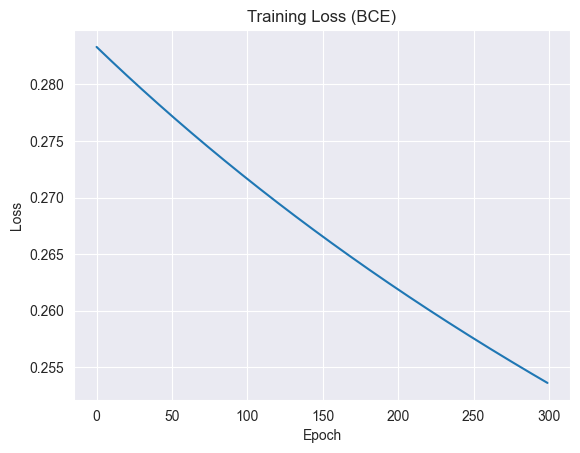

In [18]:
def plot_losses(losses):
    plt.plot(losses)
    plt.title("Training Loss (BCE)")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

plot_losses(losses)

In [19]:
w1, b1, losses = train_logistic_regression(X, y, w, b, lambda_=1e-3)

epoch: 0, loss: 0.2591
epoch: 20, loss: 0.2577
epoch: 40, loss: 0.2564
epoch: 60, loss: 0.2551
epoch: 80, loss: 0.2538
epoch: 100, loss: 0.2525
epoch: 120, loss: 0.2513
epoch: 140, loss: 0.2502
epoch: 160, loss: 0.2490
epoch: 180, loss: 0.2479
epoch: 200, loss: 0.2468
epoch: 220, loss: 0.2457
epoch: 240, loss: 0.2447
epoch: 260, loss: 0.2437
epoch: 280, loss: 0.2427


In [20]:
with torch.no_grad():
    preds = (torch.sigmoid(X @ w1 + b1) > 0.5).float()
    acc = (preds == y).float().mean().item()

print("train accuracy:", acc)

train accuracy: 0.9733333587646484


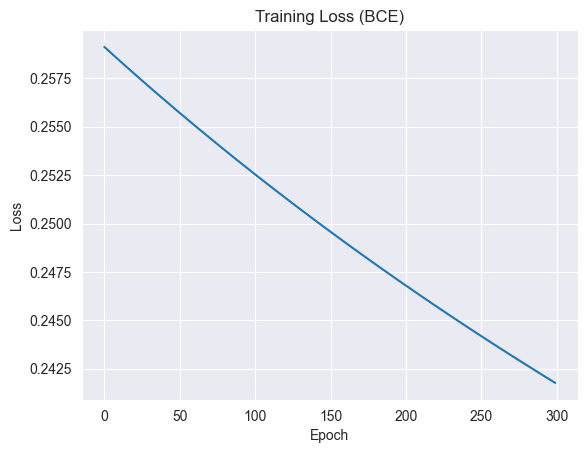

In [21]:
plot_losses(losses)